# Single plots for specific things

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks, savgol_filter
from functions import *
import pickle

### compare XRD Cu3PS4, Cu7PS6

In [5]:
folder = r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\XRD\Cu3PS4"
material= 'Cu3PS4'

# dat16_fr= pd.read_csv(os.path.join(folder, 'mittma_0016_clean_FR_tl.txt'), sep='\t', header=None, names=["2theta", "intensity"])
# dat16_br= pd.read_csv(os.path.join(folder, 'mittma_0016_clean_BR_tl.txt'), sep='\t', header=None, names=["2theta", "intensity"])
# dat20= pd.read_csv(os.path.join(folder, 'mittma_0020_clean_FR_bl.txt'), sep='\t', header=None, names=["2theta", "intensity"])
dat11= pd.read_csv(os.path.join(folder, 'mittma_0011_clean_BR_center.txt'), sep='\t', header=None, names=["2theta", "intensity"])
dat12= pd.read_csv(os.path.join(folder, 'mittma_0012_clean_BL_center.txt'), sep='\t', header=None, names=["2theta", "intensity"])
dat15= pd.read_csv(os.path.join(folder, 'mittma_0015_clean_FR_center.txt'), sep='\t', header=None, names=["2theta", "intensity"])

# labels= ['S-Cracker Off', 'S-Cracker On', 'S-Cracker On, P-rich']
labels= ['RT', '400C', '500C']
dat= [dat11, dat12, dat15]

ref_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\XRD\ref_database\reflections"

with open(os.path.join(ref_path, "reflections.pkl"), 'rb') as f:
    ref_peaks_df = pickle.load(f)

display(ref_peaks_df[f'{material}'].head(10))

indeces_table= pd.read_csv(os.path.join(folder, "powderpattern_table_collCode#656975.csv"), sep='\t')
display(indeces_table)

,Peak 2theta,Peak intensity,2theta,I
0,28.228228,530.563623,20.000000,1.142195
1,31.891892,481.050563,20.060060,3.660634
2,53.693694,361.288970,20.120120,8.179245
3,29.369369,332.629103,20.180180,12.741217
4,49.909910,262.777901,20.240240,13.837239
5,41.141141,164.261586,20.300300,10.476803
6,58.978979,143.929880,20.360360,5.530304
7,76.396396,71.074564,20.420420,2.035213
8,60.540541,37.644476,20.480480,0.522170
9,NaN,NaN,20.540541,0.093402


,H,K,L,2THETA,D-VALUE,MULT,INTENSITY
0,0,1,0,14.00,6.3265,2,3.4
1,1,-1,0,18.56,4.7800,2,20.9
2,1,1,0,18.56,4.7800,2,20.9
3,1,0,-1,19.01,4.6674,2,28.5
4,1,0,1,19.01,4.6674,2,28.5
...,...,...,...,...,...,...,...
138,1,-4,0,59.83,1.5457,2,0.0
139,2,-2,3,59.88,1.5446,2,1.9
140,2,2,3,59.88,1.5446,2,1.9
141,2,2,-3,59.88,1.5446,2,1.9


In [6]:
indexes={}
spacings={}
peaks = ref_peaks_df[f'{material}']['Peak 2theta'].dropna().sort_values().values
for i in range(0, len(peaks)):
# for i in range(0, len(ref_peaks_df['Cu3PS4']['Peak 2theta'].dropna())):
    # peak = ref_peaks_df['Cu3PS4']['Peak 2theta'].dropna().iloc[i]
    if peaks[i] >60:
        continue
        
    peak = peaks[i]
    hkl= indeces_table[(indeces_table['2THETA'] >= peak - 0.5) & (indeces_table['2THETA'] <= peak + 0.5)]
    index=[]
    spacing=[]
    d0=0
    for j in range(0,len(hkl)):
        H= hkl['H'].values[j]
        K= hkl['K'].values[j]
        L= hkl['L'].values[j]
        d= hkl['D-VALUE'].values[j]
        if d==d0:
            pass
            # index.append(f'( {H} {K} {L} ) d={d}')
        if d!=d0:
            index.append('{'+f'{np.abs(H)} {np.abs(K)} {np.abs(L)}'+'}')
            spacing.append(d)
            d0=d
            
    indexes[peak]= index
    spacings[peak]= spacing
    # indexes[peak]= [hkl['H'].values, hkl['K'].values, hkl['L'].values]

    print(peak)
    print(indexes[peak])
    # print(hkl['H'].values, hkl['K'].values, hkl['L'].values)
    # print(len(indexes))

28.22822822822823
['{0 2 0}', '{2 1 0}']
29.36936936936937
['{0 0 2}']
31.89189189189189
['{0 2 1}', '{2 1 1}']
41.14114114114114
['{0 2 2}', '{2 1 2}']
49.90990990990991
['{3 2 1}', '{2 3 0}', '{4 0 0}', '{3 1 2}']
53.693693693693696
['{0 2 3}', '{2 1 3}']
58.97897897897898
['{2 3 2}', '{4 0 2}', '{3 0 3}']


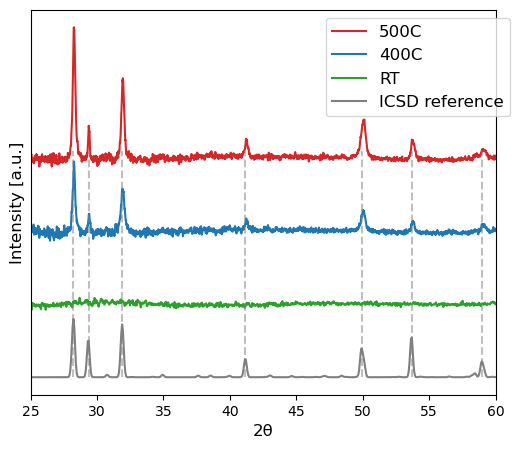

In [ ]:
plt.figure(figsize=(6,5))
# dat= [dat20, dat16_fr, dat16_br]
shift= 2000

plt.plot(dat[2]["2theta"], dat[2]["intensity"], label= labels[2], color= 'tab:red')
plt.plot(dat[1]["2theta"], dat[1]["intensity"]- shift, label= labels[1], color= 'tab:blue')
plt.plot(dat[0]["2theta"], dat[0]["intensity"]-2*shift, label= labels[0], color= 'tab:green')
plt.plot(ref_peaks_df[f'{material}']['2theta'], ref_peaks_df[f'{material}']['I']*3- 3*shift, label= 'ICSD reference', color = 'grey')
plt.vlines(ref_peaks_df[f'{material}']['Peak 2theta'].dropna().values, -3*shift, dat[0]['intensity'].max(), color='grey', linestyle='--', alpha=0.5)
for i in range(0,len(indexes)):
    peak= list(indexes.keys())[i]
    pos= indexes[peak]
    # print(pos)
    # print(len(pos))
    x= peak-2
    for j in range(0,len(pos)):
        # print(pos[j])
        y= dat[0]['intensity'].max()+500*j +200
        if i==2: #if there are overlapping labels, move one up
            y= y+1000
        # plt.text(peak-2, y, pos[j], fontsize=9)
plt.xlabel('2θ', fontsize=12)
plt.ylabel('Intensity [a.u.]', fontsize=12)
plt.yticks([])
plt.xlim(25,60)
# plt.ylim(-3.2*shift, dat[0]['intensity'].max()+500*4.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', fontsize=12)

plt.savefig(os.path.join(folder, f'XRD_{material}_tight_indexes.png'), dpi=300, bbox_inches='tight')

In [24]:
ref_peaks_df['Cu3PS4']['Peak 2theta'].dropna().values

array([28.22822823, 31.89189189, 53.69369369, 29.36936937, 49.90990991,
       41.14114114, 58.97897898, 76.3963964 , 60.54054054])

### compare XPS contaminatios

In [3]:
XPS_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\XPS"

with open(os.path.join(XPS_path, "mittma_0019_FL_core_all_normalized.pkl"), 'rb') as f:
    dat_19 = pickle.load(f)

with open(os.path.join(XPS_path, "mittma_0022_FL_core_all_normalized.pkl"), 'rb') as f:
    dat_22 = pickle.load(f)

with open(os.path.join(XPS_path, "mittma_0023_FL_core_all_normalized.pkl"), 'rb') as f:
    dat_23 = pickle.load(f)

In [4]:
display(dat_22)

Coordinate -16.0,16.0                                            \
Data type        Peak Peak BE (eV) Intensity (counts) FWHM (eV)   
0                Cu2p      952.616         1362.79392     1.963   
1                Cu2p      932.779         3961.52272      1.31   
2               Sb3d3      538.746             61.251     1.137   
3                 O1s      532.568           68.35224     2.857   
4                 C1s      285.796           47.44332     1.714   
5                 C1s      284.701          271.71876      1.35   
6                S2p3       161.91          783.20752     0.947   
7                P2p3      129.148          101.42804     0.788   

Coordinate                                                             \
Data type  Area (counts*eV) Atomic % Cu2p Total Sb3d3 Total O1s Total   
0                 778179.58   18.335     53.203       0.206     3.243   
1               1518642.957   34.868        NaN         NaN       NaN   
2                  8159.951    0.206        NaN         NaN       NaN   
3                 22873.865    3.243        NaN         NaN       NaN   
4                  9506.781    3.258        NaN         NaN       NaN   
5                 42846.126   14.673        NaN         NaN       NaN   
6                 86892.174   22.173        NaN         NaN       NaN   
7                  9323.553    3.245        NaN         NaN       NaN   

Coordinate            ... 16.0,-16.0                                  \
Data type  C1s Total  ... Cu2p Total Sb3d3 Total O1s Total C1s Total   
0             17.931  ...     56.225       0.217     3.243    15.304   
1                NaN  ...        NaN         NaN       NaN       NaN   
2                NaN  ...        NaN         NaN       NaN       NaN   
3                NaN  ...        NaN         NaN       NaN       NaN   
4                NaN  ...        NaN         NaN       NaN       NaN   
5                NaN  ...        NaN         NaN       NaN       NaN   
6                NaN  ...        NaN         NaN       NaN       NaN   
7                NaN  ...        NaN         NaN       NaN       NaN   

Coordinate                                                              
Data type  S2p3 Total P2p3 Total   Total       P          S         Cu  
0              20.079      4.932  81.236  6.0712  24.716874  69.211926  
1                 NaN        NaN     NaN     NaN        NaN        NaN  
2                 NaN        NaN     NaN     NaN        NaN        NaN  
3                 NaN        NaN     NaN     NaN        NaN        NaN  
4                 NaN        NaN     NaN     NaN        NaN        NaN  
5                 NaN        NaN     NaN     NaN        NaN        NaN  
6                 NaN        NaN     NaN     NaN        NaN        NaN  
7                 NaN        NaN     NaN     NaN        NaN        NaN  

[8 rows x 1296 columns]

In [5]:
def get_mean(dat, element):
    dat= get_data(dat, element).values.flatten()
    for i in range(0, len(dat)):
        try: 
            dat[i]= float(dat[i])
        except:
            dat[i]= np.nan

    dat = pd.Series(dat)
    dat.dropna(inplace=True)
    return dat.mean(), dat.std()

elements= ['C', 'O']
# samples = ['19', '22', '23']
# data= {}
means_19 =[]
means_22 =[]
means_23 =[]
# for sample in samples:
#     means=[]
#     stds=[]
#     for element in elements:
#         mean, std = get_mean(f'dat_{sample}', f'{element}1s Total')
#         means.append(mean)
#         stds.append(std)
#     data[sample]= [means], [stds]


for element in elements:
    
    means_19.append(get_mean(dat_19, f'{element}1s Total'))
    means_22.append(get_mean(dat_22, f'{element}1s Total'))
    means_23.append(get_mean(dat_23, f'{element}1s Total'))

means_19.append((0,0))
means_22.append(get_mean(dat_22, 'Sb3d3 Total'))
means_23.append(get_mean(dat_23, 'Sb3d3 Total'))

print(means_19)
print(means_22)
print(means_23)
# print(data)

C1s Total data at all coordinates.
C1s Total data at all coordinates.
C1s Total data at all coordinates.
O1s Total data at all coordinates.
O1s Total data at all coordinates.
O1s Total data at all coordinates.
Sb3d3 Total data at all coordinates.
Sb3d3 Total data at all coordinates.
[(17.108285714285714, 1.3470370394737798), (1.2280649350649353, 0.2101187845545778), (0, 0)]
[(15.66141975308642, 2.4226176073835797), (3.2433580246913585, 2.6062209053946384), (0.20234567901234576, 0.031793930432484734)]
[(20.05109876543211, 5.802724010335444), (8.985580246913578, 2.5121908310486565), (1.1192098765432104, 0.7052773872039529)]


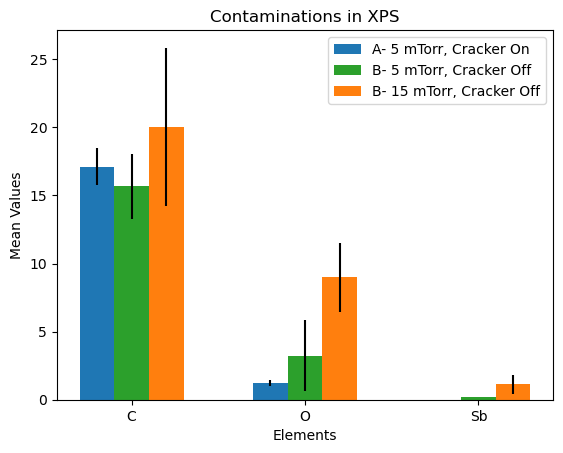

In [8]:
# Sample data
elements = ['C', 'O', 'Sb']
labels = ['A- 5 mTorr, Cracker On', 
          'B- 5 mTorr, Cracker Off', 
          'B- 15 mTorr, Cracker Off']

colors= ['tab:blue', 'tab:green', 'tab:orange']

# Extract means and errors
means = [means_19, means_22, means_23]
means_values = [[m[0] for m in mean] for mean in means]
errors = [[m[1] for m in mean] for mean in means]

# Define the bar width and positions
bar_width = 0.2
x = np.arange(len(elements))

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the bars with error bars
for i, (mean, error) in enumerate(zip(means_values, errors)):
    ax.bar(x + i * bar_width, mean, bar_width, yerr=error, label=labels[i], color=colors[i])

# Add labels and title
ax.set_xlabel('Elements')
ax.set_ylabel('Mean Values')
ax.set_title('Contaminations in XPS')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(elements)
ax.legend()

# Show the plot
plt.savefig(os.path.join(XPS_path, 'XPS_contaminations.png'), dpi=300, bbox_inches='tight')
plt.show()

### compare XPS peak shifts

In [2]:
XPS_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\XPS"

with open(os.path.join(XPS_path, "mittma_0019_FL_core_all_normalized.pkl"), 'rb') as f:
    dat_19 = pickle.load(f)

with open(os.path.join(XPS_path, "mittma_0022_FL_core_all_normalized.pkl"), 'rb') as f:
    dat_22 = pickle.load(f)

with open(os.path.join(XPS_path, "mittma_0023_FL_core_all_normalized.pkl"), 'rb') as f:
    dat_23 = pickle.load(f)

display(dat_23)

Coordinate -16.0,16.0                                            \
Data type        Peak Peak BE (eV) Intensity (counts) FWHM (eV)   
0                 C1s      284.688          226.95816     1.531   
1                 C1s      286.165            37.5812       2.4   
2                Cu2p      952.888         1075.79316     1.996   
3                Cu2p      933.089          3081.7326     1.462   
4                S2p3      161.872          171.71312     1.192   
5               Sb3d3       539.55          204.46016     2.006   
6                 O1s      532.703          286.37804     1.671   
7                P2p3      129.175          336.33212     0.823   

Coordinate                                                            \
Data type  Area (counts*eV) Atomic % C1s Total Cu2p Total S2p3 Total   
0                 40737.645   15.648    19.675     50.557      6.854   
1                 10474.406    4.027       NaN        NaN        NaN   
2                625417.389   16.534       NaN        NaN        NaN   
3               1320650.734   34.023       NaN        NaN        NaN   
4                  23947.03    6.854       NaN        NaN        NaN   
5                 48033.499    1.358       NaN        NaN        NaN   
6                  56084.23    8.919       NaN        NaN        NaN   
7                 32368.262   12.637       NaN        NaN        NaN   

Coordinate              ... 16.0,-16.0                                    \
Data type  Sb3d3 Total  ...  C1s Total Cu2p Total S2p3 Total Sb3d3 Total   
0                1.358  ...     20.285      49.68      7.223       0.721   
1                  NaN  ...        NaN        NaN        NaN         NaN   
2                  NaN  ...        NaN        NaN        NaN         NaN   
3                  NaN  ...        NaN        NaN        NaN         NaN   
4                  NaN  ...        NaN        NaN        NaN         NaN   
5                  NaN  ...        NaN        NaN        NaN         NaN   
6                  NaN  ...        NaN        NaN        NaN         NaN   
7                  NaN  ...        NaN        NaN        NaN         NaN   

Coordinate                                                               
Data type  O1s Total P2p3 Total   Total          P         S         Cu  
0             10.647     11.444  68.347  16.743968  10.56813  72.687901  
1                NaN        NaN     NaN        NaN       NaN        NaN  
2                NaN        NaN     NaN        NaN       NaN        NaN  
3                NaN        NaN     NaN        NaN       NaN        NaN  
4                NaN        NaN     NaN        NaN       NaN        NaN  
5                NaN        NaN     NaN        NaN       NaN        NaN  
6                NaN        NaN     NaN        NaN       NaN        NaN  
7                NaN        NaN     NaN        NaN       NaN        NaN  

[8 rows x 1296 columns]

In [3]:
samples= ['19', '22', '23']
labels= ['A- 5' ,
          'B- 5 ',
          'B- 15' ]

# for sample in samples:
#     dat= get_data(f'dat_{sample}', 'Sb3d3 Total').values.flatten()
#     for i in range(0, len(dat)):
#         try: 
#             dat[i]= float(dat[i])
#         except:
#             dat[i]= np.nan

#     dat = pd.Series(dat)
#     dat.dropna(inplace=True)
#     print(dat.mean(), dat.std())

P_BE={}
S_BE={}
Cu_BE={}
for sample in samples:
    if sample=='19':
        P_BE[sample]= get_data(dat_19, 'Peak BE (eV)').iloc[6,:].values.flatten()
        S_BE[sample]= get_data(dat_19, 'Peak BE (eV)').iloc[5,:].values.flatten()
        Cu_BE[sample]= get_data(dat_19, 'Peak BE (eV)').iloc[1,:].values.flatten()
    if sample=='22':
        P_BE[sample]= get_data(dat_22, 'Peak BE (eV)').iloc[7,:].values.flatten()
        S_BE[sample]= get_data(dat_22, 'Peak BE (eV)').iloc[6,:].values.flatten()
        Cu_BE[sample]= get_data(dat_22, 'Peak BE (eV)').iloc[1,:].values.flatten()
    if sample=='23':
        P_BE[sample]= get_data(dat_23, 'Peak BE (eV)').iloc[7,:].values.flatten()
        S_BE[sample]= get_data(dat_23, 'Peak BE (eV)').iloc[4,:].values.flatten()
        Cu_BE[sample]= get_data(dat_23, 'Peak BE (eV)').iloc[3,:].values.flatten()



Peak BE (eV) data at all coordinates.
Peak BE (eV) data at all coordinates.
Peak BE (eV) data at all coordinates.
Peak BE (eV) data at all coordinates.
Peak BE (eV) data at all coordinates.
Peak BE (eV) data at all coordinates.
Peak BE (eV) data at all coordinates.
Peak BE (eV) data at all coordinates.
Peak BE (eV) data at all coordinates.


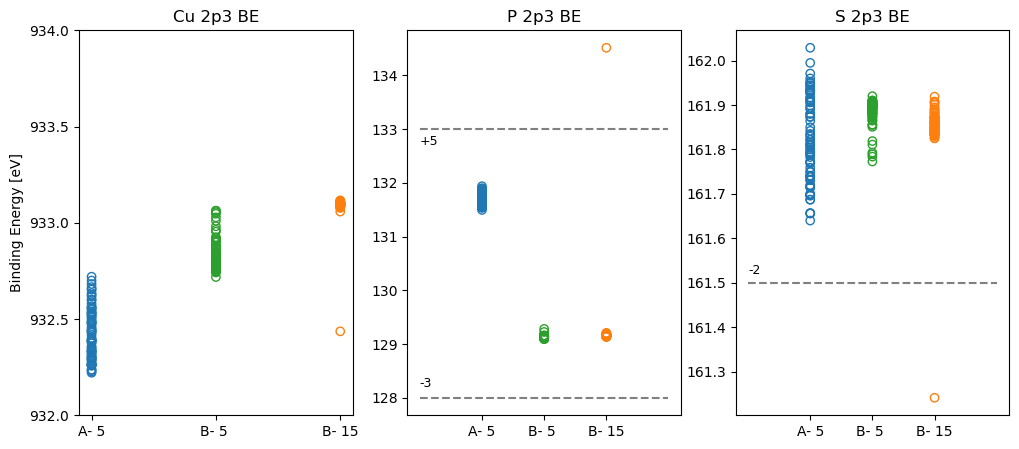

In [7]:
fig, ax=plt.subplots(1,3,figsize=(12,5))
colors = ['tab:blue', 'tab:green', 'tab:orange']
for i in range(0,len(samples)):
    sample= samples[i]
    color = colors[i]
    ax[1].scatter(len(P_BE[sample])*[i], P_BE[sample], label='P', color=color, marker='o', facecolors='none')
    ax[2].scatter(len(S_BE[sample])*[i], S_BE[sample], label='S', color=color , marker='o', facecolors='none')
    ax[0].scatter(len(Cu_BE[sample])*[i], Cu_BE[sample], label='Cu', color=color, marker='o', facecolors='none')

    ax[i].set_xticks(range(0,len(samples)))
    ax[i].set_xticklabels(labels)

ax[0].set_title('Cu 2p3 BE')
ax[1].set_title('P 2p3 BE')
ax[2].set_title('S 2p3 BE')
ax[0].set_ylabel('Binding Energy [eV]')

# ax[0].hlines([932.6, 933.4], -1, 3, color='grey', linestyle='--')
# ax[0].text(-1, 933.35, 'oxides +1,+2', fontsize=9)
# ax[0].text(-1, 932.92, '0, +1', fontsize=9)
# ax[0].text(-1, 932.62, '0', fontsize=9)
ax[0].set_ylim(932, 934)
ax[0].set_yticks(np.arange(932, 934.5, 0.5))


ax[1].hlines([128, 133], -1, 3, color='grey', linestyle='--')
ax[1].text(-1, 128.2, '-3', fontsize=9)
ax[1].text(-1, 132.7, '+5', fontsize=9)

ax[2].hlines([161.5], -1, 3, color='grey', linestyle='--')
ax[2].text(-1, 161.52, '-2', fontsize=9)

plt.savefig(os.path.join(XPS_path, 'XPS_BE_new.png'), dpi=300, bbox_inches='tight')